# 2A.soft - Git depuis le notebook

[Git](http://fr.wikipedia.org/wiki/Git) est un logiciel de suivi de source décentralisé qui permet de travailler à plusieurs sur les mêmes fichiers. Aujourd'hui, on ne crée plus de logiciels sans ce type d'outil qui permet de garder l'historique des modifications apportées à un programme. [Git](http://fr.wikipedia.org/wiki/Git) a supplanté tous les autres logiciels du même type.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
import os
root = os.path.abspath('.')

 On vérifie qu'il fonctionne :

In [3]:
!git

usage: git [--version] [--help] [-C <path>] [-c name=value]
           [--exec-path[=<path>]] [--html-path] [--man-path] [--info-path]
           [-p | --paginate | --no-pager] [--no-replace-objects] [--bare]
           [--git-dir=<path>] [--work-tree=<path>] [--namespace=<name>]
           <command> [<args>]

These are common Git commands used in various situations:

start a working area (see also: git help tutorial)
   clone      Clone a repository into a new directory
   init       Create an empty Git repository or reinitialize an existing one

work on the current change (see also: git help everyday)
   add        Add file contents to the index
   mv         Move or rename a file, a directory, or a symlink
   reset      Reset current HEAD to the specified state
   rm         Remove files from the working tree and from the index

examine the history and state (see also: git help revisions)
   bisect     Use binary search to find the commit that introduced a bug
   grep       Print li

Si cela ne fonctionne pas, cela signifie que soit [git](http://git-scm.com/) n'est pas installé, soit le notebook ne trouve pas le chemin où il est installé. Dans le premier cas, il suffit de l'installer puis de relancer le serveur de notebook pour prendre en compte les modifications. Dans le second cas, on peut s'en tirer avec une astuce du style :

In [4]:
!set PATH=%PATH%;chemin_git

Dans son utilisation la plus simple, *git* permet de synchroniser un ensemble de fichiers entre plusieurs ordinateurs et utilisateurs :

c:\Python363_x64\lib\site-packages\sphinx\util\compat.py:40: RemovedInSphinx17Warning: sphinx.util.compat.Directive is deprecated and will be removed in Sphinx 1.7, please use docutils' instead.
  RemovedInSphinx17Warning)


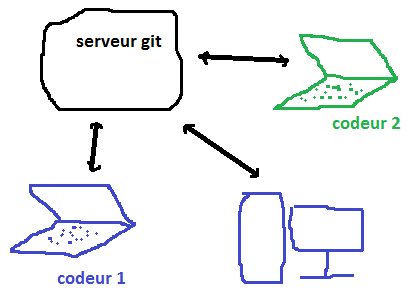

In [5]:
from pyquickhelper.helpgen import NbImage
NbImage("gits.png")

Par la suite, il faudra remplacer ``SERVEURGIT`` par le nom du serveur *git* (le serveur de l'école, github, bitbucket, ...).

## Création d'un répertoire

On crée un projet afin de pouvoir y ajouter des fichiers et de suivre leur modifications. Cette opération ne devra être réalisé qu'une seule fois. On crée ce projet dans le répertoire : ``c:\temp\premier_projet``. On crée ce répertoire puis on change le répertoire courant pour celui-ci :

In [6]:
import os
folder = r"premier_projet3"
if not os.path.exists(folder):
    os.mkdir(folder)

On initialise le répertoire :

In [7]:
!git init premier_projet3

Reinitialized existing Git repository in C:/xavierdupre/__home_/GitHub/ensae_teaching_cs/_doc/notebooks/2a/premier_projet3/.git/


## Premiers fichiers

On ajoute un premier fichier ``README.md`` :

In [8]:
%%file premier_projet3/README.md
    
Premier Projet
==============

* quelques listes

Overwriting premier_projet3/README.md


On copie ce notebook également :

In [9]:
!copy git_notebook.ipynb premier_projet3

        1 fichier(s) copi‚(s).


Git est beaucoup plus facile à utiliser si on se place dans le repértoire du projet :

In [10]:
import os
os.chdir("premier_projet3")

Il faut préciser à *git* les fichiers qu'on souhaite ajouter où dont on souhaite enregister les modifications :

In [11]:
!git add README.md
!git add git_notebook.ipynb

On enregistre ces modifications avec un commentaire :

In [12]:
!git commit -m "premier fichier et premier notebook"

[master 81f5130] premier fichier et premier notebook
 1 file changed, 729 insertions(+)
 create mode 100644 git_notebook.ipynb


Ces modifications n'ont d'incidence que sur la copie en locale et n'ont pas encore été propagées jusqu'au serveur. On le fait en exécutant les deux instructions suivantes. La première précise dans quel répertoire du serveur *git* on souhaite ajouter les modifications. Il suffit en principe de ne le faire qu'une fois.

In [13]:
!git remote add origin https://dupre@SERVEURGIT/dupre/premier_projet3.git

Si vous vous êtes trompé, vous pouvez revenir en arrière avec :

In [14]:
!git remote remove origin

La seconde propage les modifications :

In [15]:
!git push -u origin master

fatal: 'origin' does not appear to be a git repository
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


Si vous avez l'erreur précédente, c'est parce que le répertoire du projet n'a pas été créé sur le serveur git. Je vous conseille de le faire directement sur le serveur lui-même (petit icône + en haut à droite sur un serveur [GitLab](https://about.gitlab.com/)) :

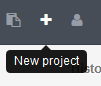

In [16]:
from pyquickhelper.helpgen import NbImage
NbImage(os.path.join(root, "gitsp.png"))

On recommence, de préférence dans la fenêtre de ligne de commande car sinon il faudra taper le mot de passe depuis la fenêtre du serveur de notebook et ce n'est pas toujours évident de ne pas se tromper.

In [17]:
!git push -u origin master

fatal: 'origin' does not appear to be a git repository
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


Les fichiers devrait être sur le serveur. Pour enregistrer d'autres modifications faite dans le répertoire local, il suffit de recommencer à partir de l'instruction ``git add``.

## Cloner un répertoire

Pour récupérer les fichiers chez soi. Il faut cloner le répertoire, par exemple dans un autre répertoire local.

In [18]:
import os
folder = r"projet3_copy"
if not os.path.exists(folder):
    os.mkdir(folder)

Puis taper la commande dans ce répertoire (de préférence depuis la ligne de commande s'il y a besoin de s'authentifier).

In [19]:
!git clone https://SERVEURGIT/dupre/premier_projet3.git/

Cloning into 'premier_projet3'...
fatal: unable to access 'https://SERVEURGIT/dupre/premier_projet3.git/': Couldn't resolve host 'SERVEURGIT'


In [20]:
import os
os.listdir(r"projet3_copy")

[]

Pour apporter les modifications sur le serveur *git*, il faut retourner aux instructions ``git add`` vues précédemment.

## Mettre à jour un répertoire local

Lorqu'on met à jour le serveur distant *git* depuis une copie locale, il est préférable de mettre à jour les autres copies locales avant de pouvoir les modifier. Il vaut mieux exécuter la commande depuis une ligne de commande s'il faut s'authentifier.

In [21]:
!git pull https://SERVEURGIT/dupre/premier_projet3.git/

fatal: unable to access 'https://SERVEURGIT/dupre/premier_projet3.git/': Couldn't resolve host 'SERVEURGIT'


## Branches

Le scénario classique pour travailler à plusieurs. On suppose qu'il existe un *repository* remote appelé *origin*. C'est le cas le plus classique quand on clone un répertoire de sources.

* On met à jour la branche principal : ``git pull`` (local = remote)
* On crée une branche local : ``git checkout -b name/branch``
* On fait sa modification.
* On commit. ``git add`` + ``git commit -m "..."``
* On met à jour le remote en créant aussi une branche là-bas : ``git push -u origin name/branch``.
* On envoie une [pull request](https://help.github.com/articles/about-pull-requests/).
* Le détenteur de la branche principale accepte ou vous demande des modifications.
* On détruit la branche une fois que les modifications sont faites ``git branch -d name/branch``.

Si la branche ``master`` est mise à jour pendant que vous travaillez à la vôtre, ``git pull origin master`` rappatriera les modifications.

## Pour aller plus loin

On peut faire beaucoup de choses avec *git* comme créer des branches, des tags, revenir à en arrière... La documentation sur git est assez pléthorique sur internet [tutoriels sur git](http://sixrevisions.com/resources/git-tutorials-beginners/) et il existe des [client git](http://git-scm.com/download/gui/linux). [TortoiseGit](https://code.google.com/p/tortoisegit/) est l'un des plus simples. Ces outils permettent de se servir de *git* sans ligne de commande, juste avec la souris et l'exporateur de fichiers.